# Game Recommender System

In [617]:
import numpy as np 
import pandas as pd 

# Import Dataset

In [618]:
games = pd.read_csv('games.csv')
games.shape

(1512, 14)

In [619]:
games.head(1)

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K


# Dataset for likelihood

In [620]:
#title
#rating
#times listed
#number of reviews
#plays
#playing
#backlogs
#wishlist

game_likelihood=games[['Title','Rating','Times Listed','Number of Reviews','Plays','Playing','Backlogs','Wishlist']] #for likelihood

# Dataset for recommendation

In [621]:
#title
#team
#rating
#genres
#summary
#reviews

games = games[['Title','Team','Rating','Genres','Summary','Reviews']]  #for recommendation

# Information on both datasets

In [622]:
games.info()
print("\n")
game_likelihood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Title    1512 non-null   object 
 1   Team     1511 non-null   object 
 2   Rating   1499 non-null   float64
 3   Genres   1512 non-null   object 
 4   Summary  1511 non-null   object 
 5   Reviews  1512 non-null   object 
dtypes: float64(1), object(5)
memory usage: 71.0+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Rating             1499 non-null   float64
 2   Times Listed       1512 non-null   object 
 3   Number of Reviews  1512 non-null   object 
 4   Plays              1512 non-null   object 
 5   Playing            1512 non-null   object 
 6   Backlogs           1512 non-null   objec

In [623]:
games.head(1512)

,Title,Team,Rating,Genres,Summary,Reviews
0,Elden Ring,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o..."
1,Hades,['Supergiant Games'],4.3,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...
2,The Legend of Zelda: Breath of the Wild,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...
3,Undertale,"['tobyfox', '8-4']",4.2,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...
4,Hollow Knight,['Team Cherry'],4.4,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with..."
...,...,...,...,...,...,...
1507,Back to the Future: The Game,['Telltale Games'],3.2,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...
1508,Team Sonic Racing,"['Sumo Digital', 'Sega']",2.9,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C..."
1509,Dragon's Dogma,['Capcom'],3.7,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ..."
1510,Baldur's Gate 3,['Larian Studios'],4.1,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...


In [624]:
game_likelihood.head(1512)

,Title,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,4.5,3.9K,3.9K,17K,3.8K,4.6K,4.8K
1,Hades,4.3,2.9K,2.9K,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,4.4,4.3K,4.3K,30K,2.5K,5K,2.6K
3,Undertale,4.2,3.5K,3.5K,28K,679,4.9K,1.8K
4,Hollow Knight,4.4,3K,3K,21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...
1507,Back to the Future: The Game,3.2,94,94,763,5,223,67
1508,Team Sonic Racing,2.9,264,264,1.5K,49,413,107
1509,Dragon's Dogma,3.7,210,210,1.1K,45,487,206
1510,Baldur's Gate 3,4.1,165,165,269,79,388,602


# Check null values

In [625]:
games.isnull().sum()

Title       0
Team        1
Rating     13
Genres      0
Summary     1
Reviews     0
dtype: int64

In [626]:
game_likelihood.isnull().sum()

Title                 0
Rating               13
Times Listed          0
Number of Reviews     0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

# Drop null values

In [627]:
games.dropna(inplace=True)

In [628]:
game_likelihood.dropna(inplace=True)

# Check duplicate values

In [629]:
games.duplicated().sum()

np.int64(384)

In [630]:
game_likelihood.duplicated().sum()

np.int64(392)

# Drop duplicate values

In [631]:
games=games.drop_duplicates()
game_likelihood=game_likelihood.drop_duplicates()

# Preparing game_likelihood dataset

In [632]:
# Function to convert 'Xk' format to pure numbers
def convert_k_to_number(value):
    if isinstance(value, str):  # Ensure the value is a string
        value = value.strip().upper()  # Remove whitespace and standardize case
        if 'K' in value:
            num = float(value.replace('K', ''))  # Remove 'K' and convert to float
            return int(num * 1000)  # Multiply by 1000 and convert to integer
        return int(value)  # If no 'K', assume it's already a number and convert to int
    return value  # Return as-is if not a string (e.g., already a number)

# List of columns to convert
columns_to_convert = ['Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']

# Apply the conversion to each column
for col in columns_to_convert:
    game_likelihood[col] = game_likelihood[col].apply(convert_k_to_number)

In [633]:
game_likelihood.head()

,Title,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,4.5,3900,3900,17000,3800,4600,4800
1,Hades,4.3,2900,2900,21000,3200,6300,3600
2,The Legend of Zelda: Breath of the Wild,4.4,4300,4300,30000,2500,5000,2600
3,Undertale,4.2,3500,3500,28000,679,4900,1800
4,Hollow Knight,4.4,3000,3000,21000,2400,8300,2300


# Adding ground truth column to game_likelihood

In [ ]:
# Step 1: Calculate the medians for the specified columns
columns_to_calc = ['Times Listed', 'Plays', 'Playing', 'Backlogs', 'Wishlist']
medians = game_likelihood[columns_to_calc].median()

# Print medians for reference
print("Column Medians:")
print(medians)

# Step 3: Define a function to determine Ground Truth considering median
def calculate_ground_truth_median(row):
    # Condition 1: Rating must be greater than 3
    rating_condition = row['Rating'] > 4
    
    # Condition 2: All specified columns must exceed their medians
    above_median_condition = all(row[col] > medians[col] for col in columns_to_calc)
    
    # Return 1 if both conditions are met, -1 otherwise
    return 1 if (rating_condition or above_median_condition) else -1

# Step 4: Apply the function to create the temporary dataset to check which one gives better split between
# positive and negative class

game_likelihood['Ground Truth'] = game_likelihood.apply(calculate_ground_truth_median, axis=1)


Column Medians:
Times Listed     446.0
Plays           3400.0
Playing           83.0
Backlogs         773.0
Wishlist         402.0
dtype: float64


In [635]:
# Count occurrences of each value in 'Ground Truth' considering median
counts_median = game_likelihood['Ground Truth'].value_counts()
print(counts_median)


Ground Truth
-1    663
 1    444
Name: count, dtype: int64


In [636]:
print("Updated DataFrame with Ground Truth:")
game_likelihood.head()

Updated DataFrame with Ground Truth:


,Title,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist,Ground Truth
0,Elden Ring,4.5,3900,3900,17000,3800,4600,4800,1
1,Hades,4.3,2900,2900,21000,3200,6300,3600,1
2,The Legend of Zelda: Breath of the Wild,4.4,4300,4300,30000,2500,5000,2600,1
3,Undertale,4.2,3500,3500,28000,679,4900,1800,1
4,Hollow Knight,4.4,3000,3000,21000,2400,8300,2300,1


# Visualize game_likelihood

In [637]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Features and target
x = game_likelihood[['Rating', 'Times Listed', 'Plays', 'Playing', 'Backlogs', 'Wishlist']]
y = game_likelihood['Ground Truth']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

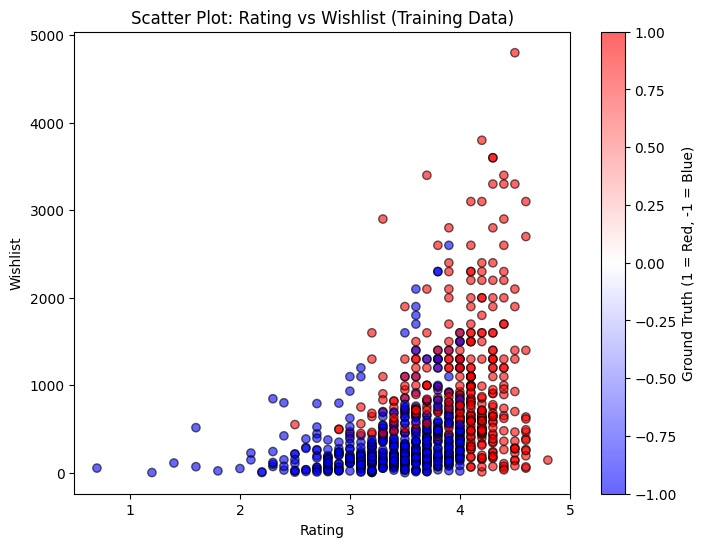

In [638]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train['Rating'], x_train['Wishlist'], c=y_train, cmap='bwr', alpha=0.6, edgecolors='k')
plt.colorbar(label='Ground Truth (1 = Red, -1 = Blue)')
plt.xlabel('Rating')
plt.ylabel('Wishlist')
plt.title('Scatter Plot: Rating vs Wishlist (Training Data)')
plt.show()

# Training SVM for predicting likelihood of the games

In [639]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib  # For saving/loading the model

# Train with explicit epochs
sgd_svm = SGDClassifier(
    loss='hinge', 
    alpha=0.0001, 
    max_iter=1000,  # Set desired number of epochs
    tol=None,  # Disable early stopping
    class_weight='balanced', 
    random_state=42
)
sgd_svm.fit(x_train, y_train)

# Save the trained SVM model (do this after training)
joblib.dump(sgd_svm, 'svm_model.pkl')

# Predict and evaluate
y_pred = sgd_svm.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Number of epochs (iterations):", sgd_svm.n_iter_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7342342342342343
Number of epochs (iterations): 1000

Classification Report:
              precision    recall  f1-score   support

          -1       0.80      0.73      0.76       129
           1       0.66      0.74      0.70        93

    accuracy                           0.73       222
   macro avg       0.73      0.74      0.73       222
weighted avg       0.74      0.73      0.74       222



# Visualize the prediction

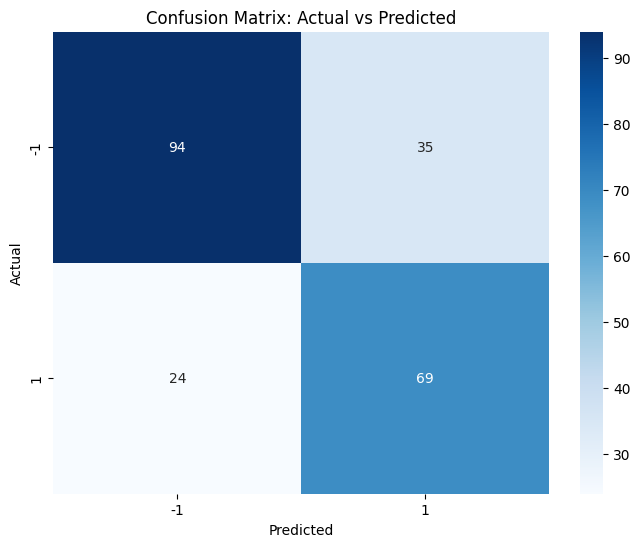

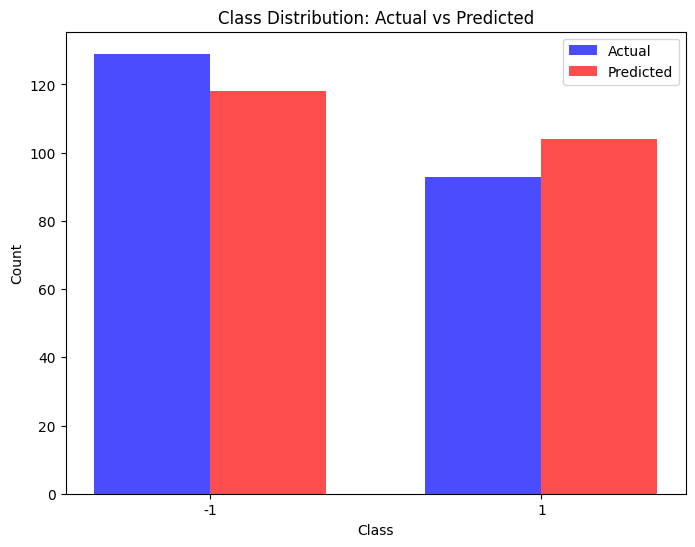

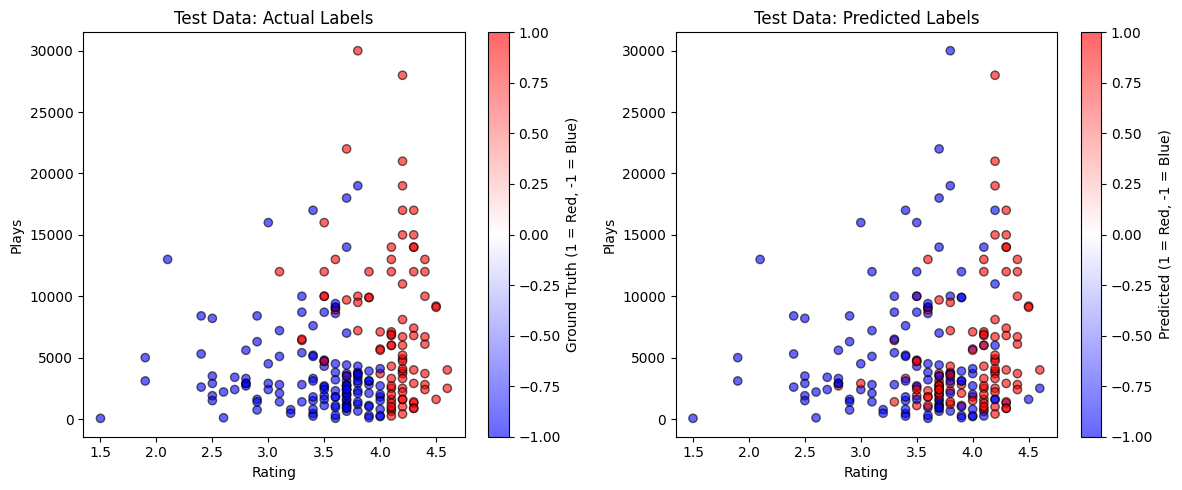

In [640]:
import seaborn as sns

# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['-1', '1'], yticklabels=['-1', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Actual vs Predicted')
plt.show()

# 2. Bar Plot of Class Distribution
plt.figure(figsize=(8, 6))
actual_counts = [sum(y_test == -1), sum(y_test == 1)]
pred_counts = [sum(y_pred == -1), sum(y_pred == 1)]
bar_width = 0.35
index = range(2)

plt.bar(index, actual_counts, bar_width, label='Actual', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in index], pred_counts, bar_width, label='Predicted', color='red', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution: Actual vs Predicted')
plt.xticks([i + bar_width / 2 for i in index], ['-1', '1'])
plt.legend()
plt.show()

# 3. Scatter Plot: Rating vs Plays with Actual and Predicted Labels
plt.figure(figsize=(12, 5))

# Subplot 1: Actual Labels
plt.subplot(1, 2, 1)
plt.scatter(x_test['Rating'], x_test['Plays'], c=y_test, cmap='bwr', alpha=0.6, edgecolors='k')
plt.colorbar(label='Ground Truth (1 = Red, -1 = Blue)')
plt.xlabel('Rating')
plt.ylabel('Plays')
plt.title('Test Data: Actual Labels')

# Subplot 2: Predicted Labels
plt.subplot(1, 2, 2)
plt.scatter(x_test['Rating'], x_test['Plays'], c=y_pred, cmap='bwr', alpha=0.6, edgecolors='k')
plt.colorbar(label='Predicted (1 = Red, -1 = Blue)')
plt.xlabel('Rating')
plt.ylabel('Plays')
plt.title('Test Data: Predicted Labels')

plt.tight_layout()
plt.show()

# Preparing games dataset for recommendation

In [641]:
games['Tags']=games['Summary']+games['Genres']+games['Team']
#reviews can lead to wrong recommendations, that's why we are keeping the Reviews column out from the Tags

In [642]:
games.head()

,Title,Team,Rating,Genres,Summary,Reviews,Tags
0,Elden Ring,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...","Elden Ring is a fantasy, action and open world..."
1,Hades,['Supergiant Games'],4.3,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,A rogue-lite hack and slash dungeon crawler in...
2,The Legend of Zelda: Breath of the Wild,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,The Legend of Zelda: Breath of the Wild is the...
3,Undertale,"['tobyfox', '8-4']",4.2,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,"A small child falls into the Underground, wher..."
4,Hollow Knight,['Team Cherry'],4.4,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",A 2D metroidvania with an emphasis on close co...


# Final dataset for recommendation with 'Tags' column

In [643]:
new_df=games[['Title','Rating','Tags']]

# Turning all the alphabets to lower case in 'Tags' column

In [644]:
new_df['Tags']=new_df['Tags'].apply(lambda x:x.lower())

/var/folders/9z/ckbkpd7x3r100l5l3b_bq7xr0000gn/T/ipykernel_92466/2750551276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Tags']=new_df['Tags'].apply(lambda x:x.lower())


In [645]:
new_df.head()

,Title,Rating,Tags
0,Elden Ring,4.5,"elden ring is a fantasy, action and open world..."
1,Hades,4.3,a rogue-lite hack and slash dungeon crawler in...
2,The Legend of Zelda: Breath of the Wild,4.4,the legend of zelda: breath of the wild is the...
3,Undertale,4.2,"a small child falls into the underground, wher..."
4,Hollow Knight,4.4,a 2d metroidvania with an emphasis on close co...


In [646]:
new_df['Tags'].info

<bound method Series.info of 0       elden ring is a fantasy, action and open world...
1       a rogue-lite hack and slash dungeon crawler in...
2       the legend of zelda: breath of the wild is the...
3       a small child falls into the underground, wher...
4       a 2d metroidvania with an emphasis on close co...
                              ...                        
1507    back to the future: the game is one of telltal...
1508    team sonic racing combines the best elements o...
1509    set in a huge open world, dragon’s dogma: dark...
1510    an ancient evil has returned to baldur's gate,...
1511    join emmet and an unlikely group of resistance...
Name: Tags, Length: 1114, dtype: object>

# Removing punctuations from the tags

In [647]:
import re

new_df['Tags'] = new_df['Tags'].apply(lambda x: re.sub(r"['\"\\.\\\]\[]", " ", x))


/var/folders/9z/ckbkpd7x3r100l5l3b_bq7xr0000gn/T/ipykernel_92466/2621656130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Tags'] = new_df['Tags'].apply(lambda x: re.sub(r"['\"\\.\\\]\[]", " ", x))


In [648]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1114 entries, 0 to 1511
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   1114 non-null   object 
 1   Rating  1114 non-null   float64
 2   Tags    1114 non-null   object 
dtypes: float64(1), object(2)
memory usage: 34.8+ KB


# Applying STEM on the tags

In [649]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def stem(text):
    y=[]
    
    for i in text.split():
        y.append(ps.stem(i))
    
    return " ".join(y) 

new_df['Tags']=new_df['Tags'].apply(stem)

/var/folders/9z/ckbkpd7x3r100l5l3b_bq7xr0000gn/T/ipykernel_92466/1997641831.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Tags']=new_df['Tags'].apply(stem)


# Call vectorizers

In [650]:
from sklearn.feature_extraction. text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer(max_features=2500,stop_words='english')
tf_idf = TfidfVectorizer(max_features=2500,stop_words='english')

# Prepare vectors

In [651]:
cv_vectors = cv.fit_transform(new_df['Tags']).toarray() #for bag of words
tf_idf_vectors = tf_idf.fit_transform(new_df['Tags']).toarray() #for tf-idf

In [652]:
cv_vectors[0]

array([0, 0, 0, ..., 0, 0, 0])

In [653]:
tf_idf_vectors[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [654]:
cv.get_feature_names_out()

array(['000', '10', '100', ..., 'zero', 'zombi', 'zone'], dtype=object)

In [655]:
tf_idf.get_feature_names_out()

array(['000', '10', '100', ..., 'zero', 'zombi', 'zone'], dtype=object)

# Find cosine_similarity of each instance with the other instances

In [656]:
from sklearn.metrics.pairwise import cosine_similarity

cv_similarity = cosine_similarity(cv_vectors)
tf_idf_similarity = cosine_similarity(tf_idf_vectors)

In [657]:
cv_similarity

array([[1.        , 0.11428571, 0.21147221, ..., 0.1490712 , 0.1081125 ,
        0.08964215],
       [0.11428571, 1.        , 0.14098148, ..., 0.10647943, 0.072075  ,
        0.05976143],
       [0.21147221, 0.14098148, 1.        , ..., 0.14448691, 0.08891084,
        0.20273269],
       ...,
       [0.1490712 , 0.10647943, 0.14448691, ..., 1.        , 0.13430383,
        0.04454354],
       [0.1081125 , 0.072075  , 0.08891084, ..., 0.13430383, 1.        ,
        0.11306675],
       [0.08964215, 0.05976143, 0.20273269, ..., 0.04454354, 0.11306675,
        1.        ]])

In [658]:
tf_idf_similarity

array([[1.        , 0.01666525, 0.05631176, ..., 0.03964813, 0.02002463,
        0.04680157],
       [0.01666525, 1.        , 0.04822719, ..., 0.03957918, 0.01217746,
        0.00528526],
       [0.05631176, 0.04822719, 1.        , ..., 0.07366635, 0.05243748,
        0.11299411],
       ...,
       [0.03964813, 0.03957918, 0.07366635, ..., 1.        , 0.04664414,
        0.0171429 ],
       [0.02002463, 0.01217746, 0.05243748, ..., 0.04664414, 1.        ,
        0.09462779],
       [0.04680157, 0.00528526, 0.11299411, ..., 0.0171429 , 0.09462779,
        1.        ]])

# Recommendation and Visualization

In [662]:
# Define the visualization function that can be added to your existing script
def recommend_and_visualize(game, new_df, similarity, svm_model_path='svm_model.pkl', n_recommendations=5):
    """
    Visualize similarity scores and SVM-predicted likelihood for recommended games.
    
    Parameters:
    -----------
    game : str
        The title of the input game
    new_df : pandas.DataFrame
        DataFrame containing game information (recommender system dataset)
    similarity : numpy.ndarray
        The cosine similarity matrix
    svm_model_path : str
        Path to the saved SVM model file (default: 'svm_model.pkl')
    n_recommendations : int, optional 
        Number of recommendations to show (default is 5)
    """
    # Load the trained SVM model
    sgd_svm = joblib.load(svm_model_path)

    # Find the index of the input game
    game_index = new_df[new_df['Title'] == game].index[0]
    
    # Get similarity scores
    distances = similarity[game_index]
    
    # Get top n recommendations (excluding the input game itself)
    game_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:n_recommendations+1]
    
    # Extract titles and similarity scores
    recommended_games = []
    similarity_scores = []
    svm_predictions = []
    
    # SVM dataset game_likelihood (e.g., game_likelihood) has the features needed for prediction
    svm_features = ['Rating', 'Times Listed', 'Plays', 'Playing', 'Backlogs', 'Wishlist']
    
    print(f"Top {n_recommendations} recommendations for '{game}':")
    for i in game_list:
        title = new_df.iloc[i[0]]['Title']
        score = i[1]
        recommended_games.append(title)
        similarity_scores.append(score)
        
        # Get SVM prediction by mapping title to the SVM dataset game_likelihood
        game_row = game_likelihood[game_likelihood['Title'] == title]
        if not game_row.empty:
            features = game_row[svm_features]
            prediction = sgd_svm.predict(features)[0]  # Predict for this game
            svm_predictions.append(prediction)
            label = "Highly recommended" if prediction == 1 else "Casually recommended"
            print(f"{title} (Similarity: {score:.4f}, {label})")
        else:
            svm_predictions.append(None)  # Handle missing titles
            print(f"{title} (Similarity: {score:.4f}, SVM Prediction: Not available)")

    # Create visualization
    plt.figure(figsize=(12, 6))
    
    # Combine game titles with SVM recommendation labels
    display_labels = []
    for title, pred in zip(recommended_games, svm_predictions):
        if pred is not None:
            label = " (Highly)" if pred == 1 else " (Casually)"
        else:
            label = " (N/A)"
        display_labels.append(f"{title}{label}")
    
    # Plot horizontal bars
    plt.barh(display_labels, similarity_scores, color='royalblue')
    
    # Add labels and title
    plt.xlabel('Cosine Similarity Score')
    plt.title(f'Games Similar to "{game}" with SVM Likelihood')
    plt.xlim(0, 1)  # Cosine similarity ranges from 0 to 1
    
    # Add similarity values at the end of each bar
    for i, v in enumerate(similarity_scores):
        plt.text(v + 0.01, i, f'{v:.4f}', va='center')
    
    plt.tight_layout()
    plt.show()
    
    # Return recommendations and scores
    return pd.DataFrame({
        'Recommended Game': recommended_games,
        'Similarity Score': similarity_scores,
        'SVM Prediction': svm_predictions
    })

# Recommend and Visualize using Bag of Words (uses countVectorizer)

Recommendation using Bag of Words approach:

Top 5 recommendations for 'Devil May Cry 5':
Devil May Cry 3: Dante's Awakening (Similarity: 0.4805, Highly recommended)
Devil May Cry HD Collection (Similarity: 0.4801, Highly recommended)
Devil May Cry 4 (Similarity: 0.4197, Casually recommended)
Devil May Cry 2 (Similarity: 0.4103, Casually recommended)
Devil May Cry 3: Dante's Awakening - Special Edition (Similarity: 0.3909, Highly recommended)


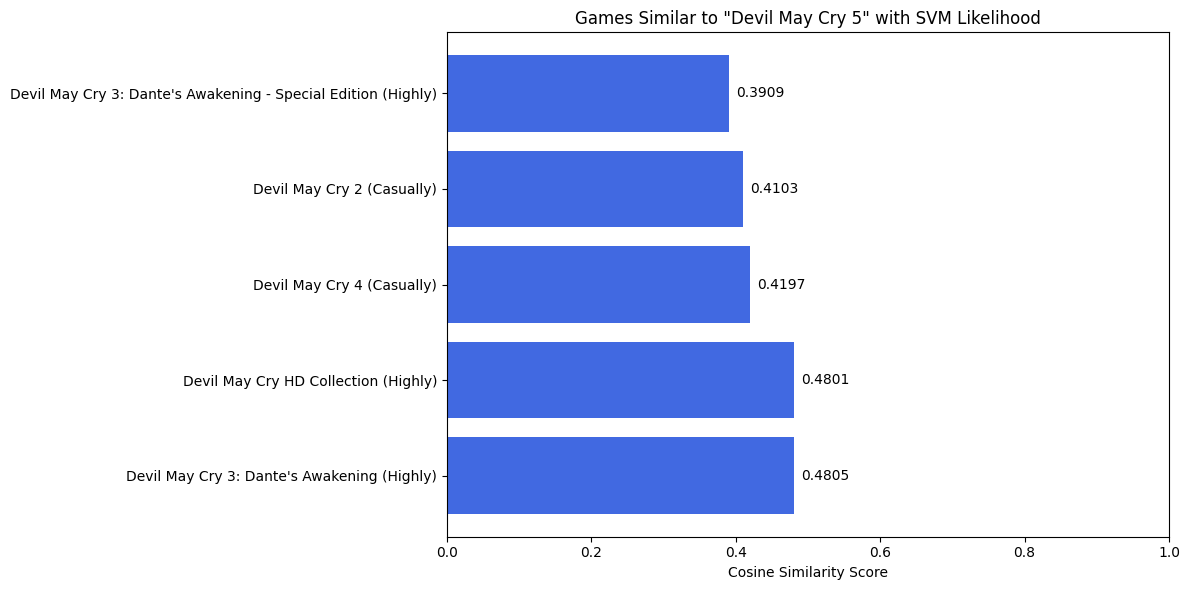

,Recommended Game,Similarity Score,SVM Prediction
0,Devil May Cry 3: Dante's Awakening,0.480494,1
1,Devil May Cry HD Collection,0.480138,1
2,Devil May Cry 4,0.419711,-1
3,Devil May Cry 2,0.410270,-1
4,Devil May Cry 3: Dante's Awakening - Special E...,0.390934,1


In [666]:
print("Recommendation using Bag of Words approach:\n")
game_title = "Devil May Cry 5"
recommend_and_visualize(game_title, new_df, cv_similarity)

# Recommend and Visualize using TF-IDF (using tfidfVectorizer)

Recommendation using TF-IDF approach:

Top 5 recommendations for 'Devil May Cry 5':
Devil May Cry HD Collection (Similarity: 0.5028, Highly recommended)
Devil May Cry 3: Dante's Awakening (Similarity: 0.4271, Highly recommended)
Devil May Cry 3: Dante's Awakening - Special Edition (Similarity: 0.3990, Highly recommended)
Devil May Cry 4 (Similarity: 0.3871, Casually recommended)
Devil May Cry 2 (Similarity: 0.3685, Casually recommended)


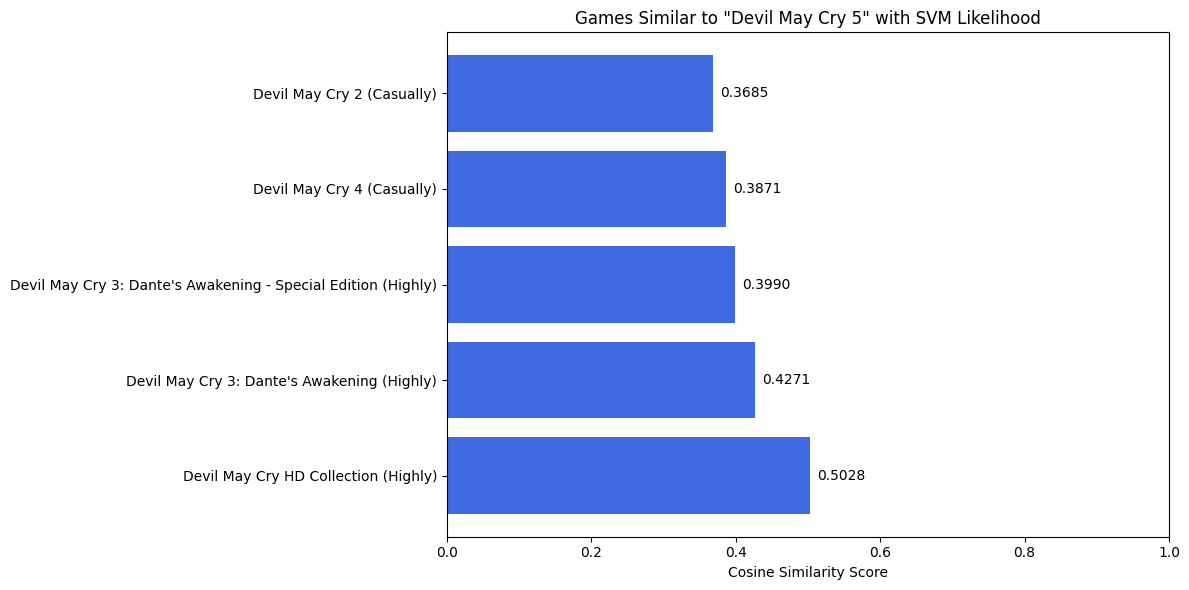

,Recommended Game,Similarity Score,SVM Prediction
0,Devil May Cry HD Collection,0.502813,1
1,Devil May Cry 3: Dante's Awakening,0.427092,1
2,Devil May Cry 3: Dante's Awakening - Special E...,0.399033,1
3,Devil May Cry 4,0.387077,-1
4,Devil May Cry 2,0.368544,-1


In [667]:
print("Recommendation using TF-IDF approach:\n")
game_title = "Devil May Cry 5"
recommend_and_visualize(game_title, new_df, tf_idf_similarity)

In [ ]:
import pickle

pickle.dump(new_df.to_dict(),open('games_dict.pkl','wb'))
pickle.dump(game_likelihood.to_dict(),open('likelihood_dict.pkl','wb'))
pickle.dump(cv_similarity,open('cv_similarity.pkl','wb'))
pickle.dump(tf_idf_similarity,open('tf_idf_similarity.pkl','wb'))